Text(0.5, 1.0, 'Original')

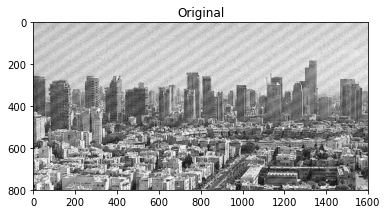

In [2]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.ndimage as ndimage

noisy = mpimg.imread('Q83584.jpg')
plt.figure(1)
plt.imshow(noisy, cmap='gray')
plt.title('Original')

19
1582


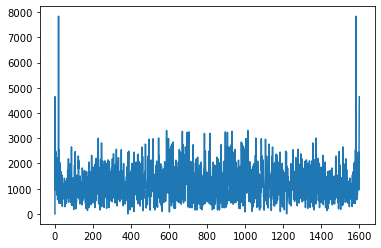

In [27]:
fft_x = np.abs(np.fft.fft(noisy[10,:] - np.mean(noisy[10,:])))
plt.plot(fft_x)
print(np.argmax(fft_x[0:800]))
print(np.argmax(fft_x))


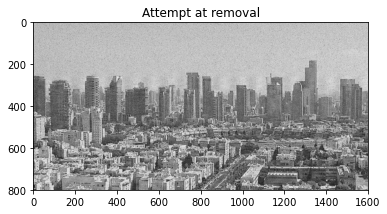

In [31]:
filtered_image = np.zeros(noisy.shape)
for row in np.arange(801):
    fft_row = np.fft.fft(noisy[row,:])
    fft_row[19] = (fft_row[18] + fft_row[20])/2 # Replace with values from either side
    fft_row[1582] = (fft_row[1581] + fft_row[1583])/2 # Replace with values from either side
    filtered_image[row,:] = np.real(np.fft.ifft(fft_row))
        
plt.figure(2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Attempt at removal')
plt.imsave('Q83584_filtered.jpg', filtered_image, cmap='gray')